El objetivo es crear gráficos para visualizar la cantidad de políticas industriales en Latinoamérica durante el 2023.

## Importar librerías

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/Datos Python/NIPO'

/content/drive/MyDrive/Datos Python/NIPO


## Cargar el archivo y limpiar base

In [ ]:
# Cargar el archivo
nipo = pd.read_excel('GTA+NIPO+-+latest+release.xlsx')

In [ ]:
nipo['Jurisdiction'].unique()

array(['United States of America', 'Philippines', 'India',
       'European Union', 'South Africa', 'United Kingdom', 'Singapore',
       'Peru', 'Eurasian Economic Union', 'Russia', 'Mexico', 'GCC',
       'Ukraine', 'Republic of Korea', 'Indonesia', 'Netherlands',
       'New Zealand', 'Mercosur', 'Brazil', 'Germany', 'Malaysia',
       'Austria', 'Switzerland', 'Argentina', 'Australia', 'Turkey',
       'Colombia', 'Thailand', 'Tunisia', 'Italy', 'Portugal', 'Japan',
       'Canada', 'Egypt', 'Bolivia', 'Vietnam', 'China', 'Denmark',
       'Spain', 'Iceland', 'Belgium', 'France', 'Saudi Arabia', 'Ecuador',
       'Pakistan', 'Poland', 'Czechia', 'Sweden', 'Greece', 'Hungary',
       'Algeria', 'Finland', 'Slovenia', 'Croatia', 'Kenya', 'Chile',
       'United Arab Emirates', 'Ireland', 'Hong Kong', 'Chinese Taipei',
       'Slovakia', 'Nigeria', 'Nepal', 'Morocco', 'Bangladesh', 'Serbia',
       'SACU', 'Ghana'], dtype=object)

In [ ]:
latinamerica = ['Peru','Mexico','Mercosur','Brazil','Argentina','Colombia','Bolivia','Ecuador','Chile']
nipo_latinamerica = nipo[nipo['Jurisdiction'].isin(latinamerica)]

In [ ]:
nipo_latinamerica.head()

,Entry ID,Jurisdiction,Initial assessment (change relative to 1 Jan 2023),Title,Source,Announcement date,Implementation date,Removal date,GTA intervention type,Level of government implementation,...,Motive: Strategic competitiveness,Motive: Climate change mitigation,Motive: Geopolitical concerns,Mentions food security,Mentions public health concerns,Mentions other,Motive: Source,URL,Trade covered (USD million),Size of subsidy (USD million)
9,84252,Peru,Liberalising,Peru: New framework of the agro-industrial sec...,El Peruano. Official Gazette. Ley del Régimen ...,2020-12-31,2023-01-01,2024-12-31,Tax or social insurance relief,National,...,True,False,False,False,False,False,El objeto de la presente ley es promover y for...,https://www.globaltradealert.org/intervention/...,NaN,NaN
20,100353,Mexico,Liberalising,Mexico: Changes to the import duties of iron a...,Diario Oficial de la Federación. Official gaze...,2021-11-22,2023-06-01,2023-09-21,Import tariff,National,...,False,False,False,False,False,False,No official quote available.,https://www.globaltradealert.org/intervention/...,2127.6,NaN
21,100354,Mexico,Liberalising,Mexico: Changes to the import duties of iron a...,Diario Oficial de la Federación. Official gaze...,2021-11-22,2023-09-22,NaT,Import tariff,National,...,False,False,False,False,False,False,No official quote available.,https://www.globaltradealert.org/intervention/...,1694.5,NaN
45,107052,Mexico,Distortive,Mexico: Provisional antidumping duty on import...,"Diario Oficial de la Federación, Resolución po...",2022-07-28,2023-09-13,NaT,Anti-dumping,National,...,False,False,False,False,False,False,No official quote available.,https://www.globaltradealert.org/intervention/...,11.1,NaN
47,107581,Mercosur,Liberalising,MERCOSUR: Reduction of the Common External Tar...,"MERCOSUR, Mercado Común del Sur. ""Resolución N...",2022-07-20,2023-01-01,NaT,Import tariff,Supra-national,...,False,False,False,False,False,False,No official quote available.,https://www.globaltradealert.org/intervention/...,642.5,NaN


## Gráficos

In [ ]:
# Creo una lista con los países con más medidas implementadas
cantidad_medidas = pd.DataFrame(nipo_latinamerica['Jurisdiction'].value_counts()).reset_index()
cantidad_medidas.rename(columns={'index':'Jurisdiction','Jurisdiction':'cantidad'}, inplace=True)
top = list(cantidad_medidas['Jurisdiction'])
top

['Brazil',
 'Argentina',
 'Mexico',
 'Mercosur',
 'Peru',
 'Colombia',
 'Bolivia',
 'Ecuador',
 'Chile']

### Gráfico 1

In [ ]:
# Creo una base con la cual graficar el número de medidas según país y su tipo

# Parto de la base inicial
df2 = nipo_latinamerica.groupby(['Jurisdiction','Initial assessment (change relative to 1 Jan 2023)']).agg('count').reset_index()
df2.rename(columns={'Initial assessment (change relative to 1 Jan 2023)':'tipo','Entry ID':'cantidad'},inplace=True)
# Me quedo con las variables relevantes
df2 = df2[['Jurisdiction','tipo','cantidad']]
# Paso la base de formato long a wide para tener el tipo de medida en las columnas
df2_pivot = df2.pivot(index='Jurisdiction',columns='tipo',values='cantidad').reset_index()
# Reemplazo los valores nulos por cero y sumo las medidas para poder ordenar los países por sus totales
df2_pivot.fillna(0,inplace = True)
df2_pivot['Total']=df2_pivot['Distortive']+df2_pivot['Liberalising']
df2_pivot.sort_values(by='Total',ascending=False,inplace=True)
# Reemplazo algunos nombres de países por su equivalente en español
df2_pivot['Jurisdiction'].replace({'Brazil':'Brasil','Mexico':'México','Peru':'Perú'},inplace=True)

df2_pivot.reset_index(inplace=True,drop=True)
df3 = df2_pivot.astype({'Distortive':int,'Liberalising':int,'Total':int})
df3

tipo,Jurisdiction,Distortive,Liberalising,Total
0,Brasil,111,61,172
1,Argentina,42,20,62
2,México,23,5,28
3,Mercosur,1,5,6
4,Bolivia,2,0,2
5,Colombia,1,1,2
6,Perú,0,2,2
7,Chile,1,0,1
8,Ecuador,0,1,1


In [ ]:
def addlabels(range,x,y):
  """ Escribe etiquetas de los datos sobre las barras del gráfico """
  for i in range:
      plt.text(i, y[i]+1, y[i], ha = 'center', fontsize=8)

<Figure size 800x500 with 0 Axes>

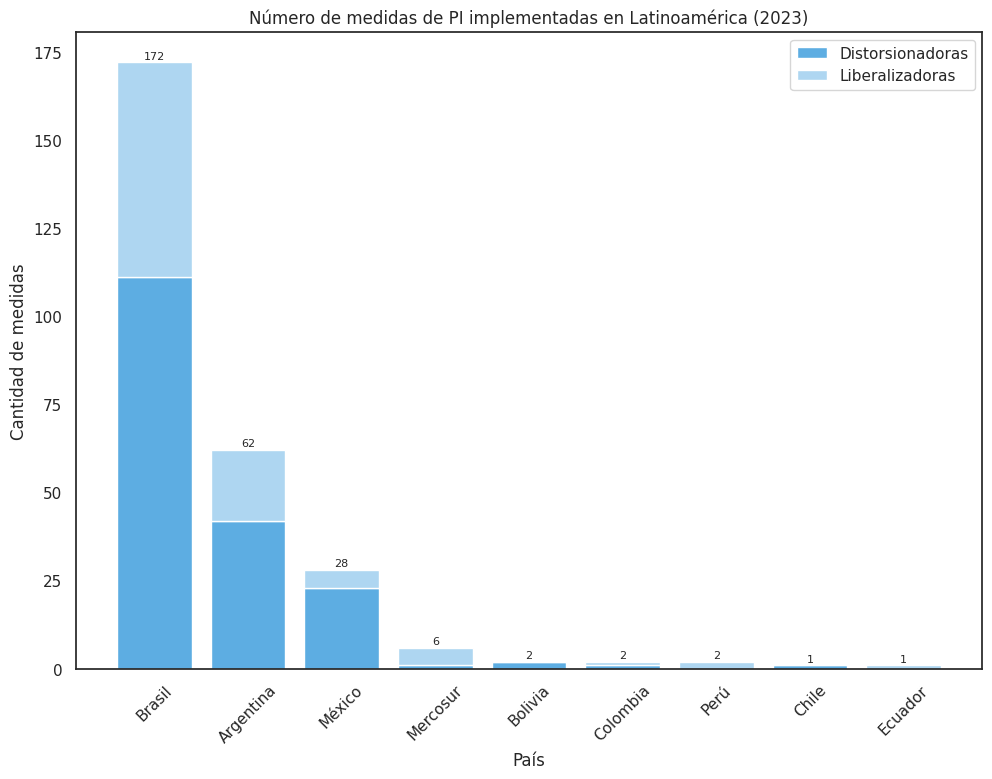

In [ ]:
# Dibujo del gráfico
plt.figure(figsize=(8,5))

fig, ax = plt.subplots()
ax.bar(df3['Jurisdiction'],df3['Distortive'],color='#5DADE2',label='Distorsionadoras')
ax.bar(df3['Jurisdiction'],df3['Liberalising'],color='#AED6F1',bottom=df3['Distortive'],label='Liberalizadoras')
plt.xticks(rotation=45)
plt.title('Número de medidas de PI implementadas en Latinoamérica (2023)')
plt.xlabel('País')
plt.ylabel('Cantidad de medidas')
plt.legend()

# Inserto etiquetas de datos sobre barras
addlabels(df3.index,df3['Jurisdiction'],df3['Total'])

plt.savefig('Gráfico 1.png',bbox_inches='tight')

### Gráfico 2

Necesito una base que cuente las observaciones de los instrumentos aplicados y su tipo (liberalising o distorting).

In [ ]:
# Groupby de la NIPO
df4 = nipo_latinamerica[['Jurisdiction','Initial assessment (change relative to 1 Jan 2023)','GTA intervention type']].groupby(['Initial assessment (change relative to 1 Jan 2023)','GTA intervention type']).agg('count').reset_index()
df4.head()

,Initial assessment (change relative to 1 Jan 2023),GTA intervention type,Jurisdiction
0,Distortive,Anti-dumping,5
1,Distortive,Anti-subsidy,1
2,Distortive,Capital injection and equity stakes (including...,3
3,Distortive,Export ban,1
4,Distortive,Export quota,1


In [ ]:
# Clasificación de instrumentos de política
export_barriers = ['Export ban','Export licensing requirement','Export quota','Export tariff quota','Export tax','Local supply requirement for exports','Export-related non-tariff measure, nes18']
import_barriers = ['Anti-dumping','Anti-subsidy','Import ban','Import licensing requirement','Import monitoring','Import quota','Import tariff','Import tariff quota','Internal taxation of imports','Import-related non-tariff measure, nes']
domestic_subsidies = ['Capital injection and equity stakes (including bailouts)','Financial grant','In-kind grant','Tax or social insurance relief','Production subsidy','Interest payment subsidy','Loan guarantee','Import incentive','Price stabilization','Price stabilisation','State loan','State aid, nes','State aid, unspecified']
export_incentives = ['Trade finance','Export subsidy','Tax-based export incentive','Financial assistance in foreign market','Other export incentive']
others = ['Instrument unclear']
fdi = ['FDI: Entry and ownership rule','FDI: Financial incentive','FDI: Treatment and operations, nes']
localization = ['Local content incentive','Local content requirement','Local operations incentive','Local operations requirement','Local value added incentive','Public procurement localization','Localization, nes']

# Diccionario que define los reemplazos a realizar
reemplazos = {'Barreras a la exportación':export_barriers,'Barreras a la importación':import_barriers,'Subsidios domésticos':domestic_subsidies,'Incentivos a la exportación':export_incentives,'Otros':others,'Inversión directa extranjera':fdi,'Localización de contenido':localization}

In [ ]:
def reemplazar(df,dict):
  """ Recibe un dataframe y un diccionario con valores a reemplazar y los reemplaza."""
  for nombre,lista in dict.items():
    df.replace(lista,nombre,inplace=True)

In [ ]:
# Reemplazos para tener la clasificación
reemplazar(df4,reemplazos)
# Reemplazos de los tipos por su equivalente en español
df4.replace({'Distortive':'Distorsionadores','Liberalising':'Liberalizadores'}, inplace=True)

In [ ]:
# Agrupo para tener la cantidad de instrumentos y cambio los nombres de las columnas
df5 = df4.groupby(['Initial assessment (change relative to 1 Jan 2023)','GTA intervention type']).agg('sum').reset_index()
df5.rename(columns={'Initial assessment (change relative to 1 Jan 2023)':'tipo','GTA intervention type':'categoria','Jurisdiction':'cantidad'},inplace=True)
df5

,tipo,categoria,cantidad
0,Distorsionadores,Barreras a la exportación,4
1,Distorsionadores,Barreras a la importación,63
2,Distorsionadores,Incentivos a la exportación,11
3,Distorsionadores,Inversión directa extranjera,3
4,Distorsionadores,Localización de contenido,14
5,Distorsionadores,Otros,2
6,Distorsionadores,Subsidios domésticos,84
7,Liberalizadores,Barreras a la exportación,4
8,Liberalizadores,Barreras a la importación,79
9,Liberalizadores,Incentivos a la exportación,2


In [ ]:
# Orden de los instrumentos según número de veces implementados (top)
recuento = df5.groupby('categoria',as_index=False).agg('sum')
recuento = recuento.sort_values(by='cantidad',ascending=False)
top = list(recuento['categoria'])

<ipython-input-24-55d8750da827>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  recuento = df5.groupby('categoria',as_index=False).agg('sum')


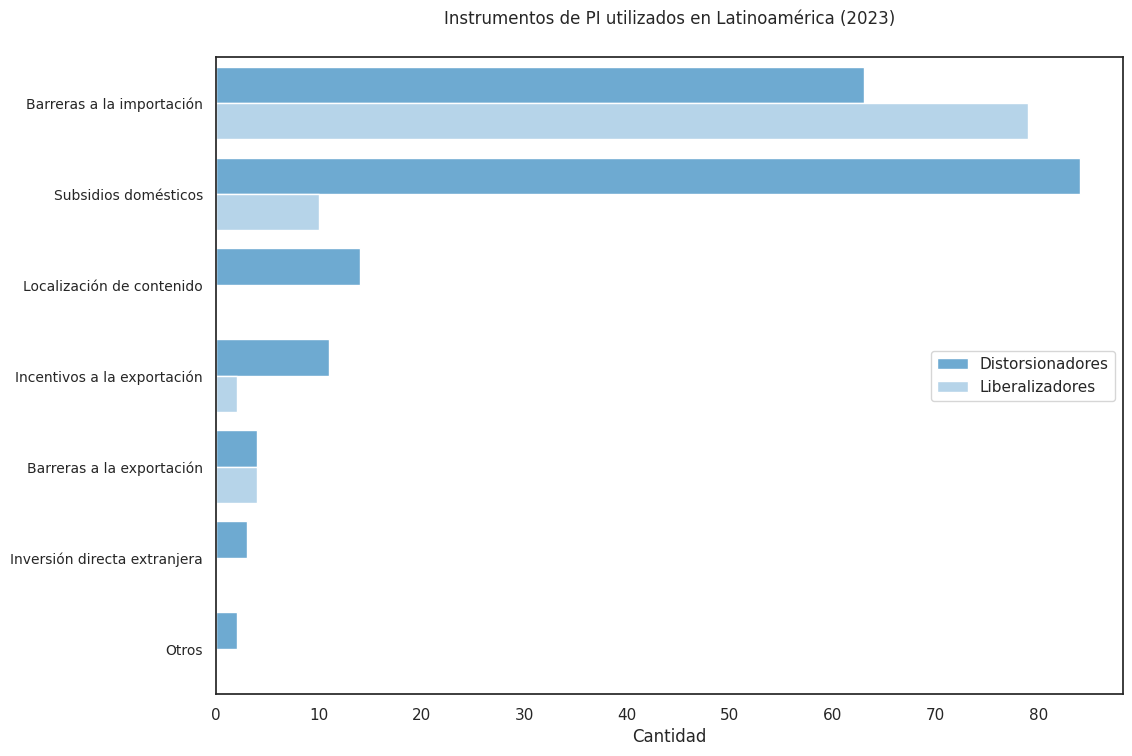

In [ ]:
# Dibujo del gráfico
sns.set_style('white')

labels = ['Distorsionadores','Liberalizadores']
sns.barplot(df5,y='categoria',x='cantidad',order=top,palette=['#5DADE2','#AED6F1'],hue='tipo',hue_order=labels)
plt.yticks(size=10)
plt.xlabel('Cantidad')
plt.ylabel('')
plt.title('Instrumentos de PI utilizados en Latinoamérica (2023)',y=1.04)
plt.legend(loc='center right')

plt.savefig('Gráfico 2.png',bbox_inches='tight')